In [1]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
import scipy.sparse as sp
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)


In [2]:

energy_groups = np.array([1.42907e+07, 1.00000e+06, 3.00000e+02, 1.00000e+01, 1.00000e-01])

data_dict = {
    'BackSupportingStructure': (
        np.array([14.77209636, 22.96845169, 54.47200191, 55.70180008]),
        np.array([[[ 1.24942070e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.25795981e+00,  2.28111810e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  9.67748935e-02,  5.36368996e+01,  5.82725123e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.27187063e-01,  5.36495120e+01]],

         [[ 4.64231618e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-5.90813815e-02,  1.25643926e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -3.10286088e-02,  7.18068214e-01,  4.21791065e-03],
          [ 0.00000000e+00,  0.00000000e+00, -4.20798752e-02,  6.50962964e-01]],

         [[ 3.82012630e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.46871139e-02,  9.61673768e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.16188014e-04,  1.28078481e-02,  2.23290762e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.08101746e-03, -3.08412536e-02]],

         [[ 2.08341971e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.70518233e-02,  7.25544490e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.98970282e-04,  4.42525801e-02,  9.53335424e-04],
          [ 0.00000000e+00,  0.00000000e+00, -2.58888636e-05, -9.47098354e-03]],

         [[ 1.14886241e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-6.08587092e-03,  8.04990888e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.44134581e-04, -9.98122892e-03,  4.12105430e-04],
          [ 0.00000000e+00,  0.00000000e+00, -3.62110923e-04, -1.28478212e-03]],

         [[ 5.59608630e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.94979824e-03,  3.66068753e-03,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  3.15193776e-05,  1.61003934e-02,  1.07907715e-04],
          [ 0.00000000e+00,  0.00000000e+00, -3.32111930e-04, -1.38009632e-02]]])
    ),
    'BreedingZone': (
        np.array([14.26520099, 33.2374296 , 46.22254283, 64.78551751]),
        np.array([[[ 1.27263811e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.68263604e+00,  3.22756614e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.62800524e-01,  3.99674013e+01,  2.72044739e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.01872030e-01,  4.01261596e+01]],

         [[ 5.69873316e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.63175461e-02,  2.63653402e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -7.65089532e-02,  2.32328167e+00,  2.60787954e-03],
          [ 0.00000000e+00,  0.00000000e+00, -3.47139625e-02,  2.34997165e+00]],

         [[ 3.56722532e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.21476924e-02,  4.79992444e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -5.16520833e-03,  4.91821817e-02,  2.39643838e-03],
          [ 0.00000000e+00,  0.00000000e+00,  2.52550546e-04,  4.81297066e-03]],

         [[ 2.00462038e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.95537183e-02,  4.83582428e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.44775908e-04,  4.30629484e-02,  2.11016838e-03],
          [ 0.00000000e+00,  0.00000000e+00,  4.91736887e-04,  8.59957616e-03]],

         [[ 1.07216613e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-3.41887931e-03,  2.48490116e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -4.63035411e-04,  1.62493885e-03,  1.77783070e-03],
          [ 0.00000000e+00,  0.00000000e+00, -4.66834907e-04, -9.65295073e-02]],

         [[ 4.94932801e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.56340688e-03,  1.77672427e-03,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  6.05788559e-05, -4.16034752e-03,  1.42673026e-03],
          [ 0.00000000e+00,  0.00000000e+00, -4.02825900e-06, -1.24300871e-01]]])
    ),
    'FirstWall': (
        np.array([15.28360321, 22.77599714, 57.37177834, 59.02067236]),
        np.array([[[ 1.35739102e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.47264631e+00,  2.27073391e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  3.71920704e-02,  5.67913293e+01,  1.58972770e-02],
          [ 0.00000000e+00,  0.00000000e+00,  2.24933173e-02,  5.73402116e+01]],

         [[ 5.86238206e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 3.42093512e-02,  2.09849877e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.19380091e-02,  6.39940915e-01,  9.59542653e-03],
          [ 0.00000000e+00,  0.00000000e+00, -7.19817190e-03,  6.81404367e-01]],

         [[ 4.70132164e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.32212713e-02,  1.68460566e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  9.36025916e-05,  6.19816549e-02,  2.18780421e-03],
          [ 0.00000000e+00,  0.00000000e+00, -6.53698616e-05, -1.33153790e-01]],

         [[ 3.40430933e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.30475963e-02,  1.62770030e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.23515743e-04,  1.18566666e-01, -2.29875869e-03],
          [ 0.00000000e+00,  0.00000000e+00,  6.21638288e-05,  3.16992612e-02]],

         [[ 2.48736323e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 8.42745972e-04,  1.42515822e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.35970420e-04,  7.19430772e-02, -3.98712470e-03],
          [ 0.00000000e+00,  0.00000000e+00, -1.34316710e-04, -1.73357264e-01]],

         [[ 1.67694811e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.33650490e-04,  3.39274089e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -5.25059140e-04, -7.96544962e-02, -3.85966729e-03],
          [ 0.00000000e+00,  0.00000000e+00,  3.03105854e-06, -6.13323799e-02]]])
    ),
    'Plasma': (
        np.array([8.88507082, 0.1       , 0.1       , 0.1       ]),
        np.array([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]])
    ),
    'TungstenArmor': (
        np.array([ 35.62796196,  55.19855355, 170.68293579,  97.62430527]),
        np.array([[[ 3.30981502e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.23786233e+01,  5.39927385e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  3.81105370e-03,  1.44466525e+02,  1.33580218e-01],
          [ 0.00000000e+00,  0.00000000e+00,  6.34121092e-03,  4.26289394e+01]],

         [[ 1.74633605e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.42497322e-01,  7.97618562e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.29351683e-04,  4.65014502e-01,  3.91297892e-02],
          [ 0.00000000e+00,  0.00000000e+00, -1.87361531e-03,  1.75203903e+00]],

         [[ 1.43568377e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-5.63057553e-02,  3.44580388e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -3.07670565e-04, -7.27429723e-03,  1.95999255e-02],
          [ 0.00000000e+00,  0.00000000e+00, -5.14844961e-04,  3.37708238e-02]],

         [[ 1.19294691e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 7.00295216e-03,  1.13919178e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.43342420e-04, -4.30902562e-01,  4.93136604e-02],
          [ 0.00000000e+00,  0.00000000e+00,  1.46932234e-04,  7.67155835e-01]],

         [[ 9.75011766e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.51936726e-02,  3.19768662e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.58680837e-04, -3.37626089e-01,  8.51612036e-03],
          [ 0.00000000e+00,  0.00000000e+00,  5.40664309e-04,  1.22455518e-01]],

         [[ 8.12408076e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-3.15909978e-03,  1.81364732e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  4.02821611e-07,  4.95540772e-01, -3.56710582e-02],
          [ 0.00000000e+00,  0.00000000e+00, -5.33719860e-05,  1.27297386e-01]]])
    ),
    'VVShield': (
        np.array([ 26.47837879,  82.79717601, 113.04865901, 116.92695037]),
        np.array([[[ 1.75783052e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 8.75630464e+00,  7.68543671e+01,  0.00000000e+00,  0.00000000e+00],
          [ 8.45647746e-04,  5.53553434e+00,  9.66124369e+01,  1.62193366e-04],
          [ 4.10894125e-04,  1.83052937e-01,  1.55851386e+01,  1.01413898e+02]],

         [[ 7.36928750e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.66212746e+00,  2.54116983e+01,  0.00000000e+00,  0.00000000e+00],
          [ 9.70018107e-05,  2.14171330e+00,  3.00609316e+01,  1.18475218e-04],
          [ 9.56673483e-05,  1.72473635e-02,  6.58129813e+00,  3.19741496e+01]],

         [[ 5.66377710e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 7.93395421e-01,  1.13522342e+01,  0.00000000e+00,  0.00000000e+00],
          [-4.04915178e-04, -6.17607927e-01,  1.51388727e+01,  4.87926363e-05],
          [-1.72036114e-04, -8.69943812e-02, -1.67150354e+00,  1.47688177e+01]],

         [[ 3.01413788e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.10801549e+00,  1.41669720e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.41630228e-04, -1.42752214e+00,  3.99017864e+00, -1.93967678e-05],
          [-1.30536057e-04, -2.43641338e-02, -3.94754939e+00,  3.17768329e+00]],

         [[ 1.57585804e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-9.00345813e-01, -1.18628291e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.73264081e-04, -4.63214103e-01, -8.43293384e-01, -6.11782273e-05],
          [ 7.58404715e-05,  5.84478464e-02, -1.43987671e+00, -6.47577749e-01]],

         [[ 7.05655289e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.60766923e-01, -4.59181612e-01,  0.00000000e+00,  0.00000000e+00],
          [ 1.68556788e-04,  4.10931592e-01, -1.00158100e+00, -6.48254833e-05],
          [ 1.36212757e-04,  2.82734288e-02,  9.03335911e-01, -9.43603087e-01]]])
    ),
    'VVWallBack': (
        np.array([25.79247168, 51.11727444, 88.78516302, 92.20411034]),
        np.array([[[ 2.19699856e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 3.62523764e+00,  5.06345155e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.88910130e-01,  8.68210498e+01,  3.11055824e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.07586836e+00,  8.63905171e+01]],

         [[ 8.17093304e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.45699763e-01,  2.49713044e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.00221140e-01,  1.37514701e+00,  1.84426019e-03],
          [ 0.00000000e+00,  0.00000000e+00, -3.78407230e-01,  7.50659477e-02]],

         [[ 6.64937463e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 6.48673482e-02,  1.66073168e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  6.80970615e-03,  8.67469213e-02,  8.50553181e-05],
          [ 0.00000000e+00,  0.00000000e+00,  8.76649594e-03, -1.42145790e-01]],

         [[ 3.66174097e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-4.63481600e-02,  1.86828389e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -4.45571897e-03,  1.11516247e-01, -1.14519665e-03],
          [ 0.00000000e+00,  0.00000000e+00,  2.43672929e-03,  1.85445612e-01]],

         [[ 2.08281486e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-5.02256373e-03,  1.23637773e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.88338906e-03, -1.69530267e-02, -1.25185323e-03],
          [ 0.00000000e+00,  0.00000000e+00,  7.53813912e-04, -2.99178740e-01]],

         [[ 1.01427992e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.07524659e-02,  5.78436813e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.13188124e-03,  1.57604197e-01, -4.19984418e-04],
          [ 0.00000000e+00,  0.00000000e+00,  1.20025912e-02,  4.25099841e-02]]])
    ),
    'VVWallFront': (
        np.array([24.44039741, 48.51043365, 88.89183676, 91.29762668]),
        np.array([[[ 2.02577023e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 4.14585073e+00,  4.81968058e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.75784854e-01,  8.72837262e+01,  4.72404270e-03],
          [ 0.00000000e+00,  0.00000000e+00,  5.89969998e-01,  8.69088138e+01]],

         [[ 6.76159895e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.61604791e-01,  2.19505396e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -5.59894292e-02,  9.57622837e-01,  3.15556802e-03],
          [ 0.00000000e+00,  0.00000000e+00, -2.02398281e-01,  1.58826704e+00]],

         [[ 5.57742629e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 9.32512768e-02,  1.43047190e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.89497192e-03, -2.55776254e-02,  1.12146368e-03],
          [ 0.00000000e+00,  0.00000000e+00,  3.59768572e-03, -4.71665117e-01]],

         [[ 2.51342530e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-6.25062066e-02,  1.09156981e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.59441999e-03,  1.65931463e-01, -1.51215029e-04],
          [ 0.00000000e+00,  0.00000000e+00,  4.80587532e-03, -2.15759398e-01]],

         [[ 1.32974418e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.91303001e-02,  1.17182597e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.42861088e-04, -8.22885192e-03, -2.96211260e-04],
          [ 0.00000000e+00,  0.00000000e+00, -6.07784044e-03, -1.14983166e-01]],

         [[ 4.99412662e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 4.13827372e-03,  2.46399333e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.53108267e-03, -3.38389056e-02,  1.14031420e-04],
          [ 0.00000000e+00,  0.00000000e+00,  1.61791981e-03,  1.62309618e-02]]])
    ),
}

aux_data_dict = {
    'BackSupportingStructure': {
        'heating': np.array([1.96243487e+04, 7.64483843e+02, 4.57802819e+00, 1.15483421e+01]),
        'nt': np.array([2.11062784e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'BreedingZone': {
        'heating': np.array([ 119806.09732053,   40496.41088611,  289594.04437045, 1167898.82782947]),
        'nt': np.array([0.00127852, 0.00682984, 0.06053289, 0.24413547]),
    },
    'FirstWall': {
        'heating': np.array([6.70264822e+04, 1.54226304e+03, 5.10790572e+00, 8.42094829e+00]),
        'nt': np.array([6.84443328e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'Plasma': {
        'heating': np.array([1.37372566e+04, 3.85362758e+02, 4.58094919e-01, 8.15790335e-01]),
        'nt': np.array([8.51041773e-13, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'TungstenArmor': {
        'heating': np.array([9.16728376e+03, 1.28632502e+03, 7.33933737e+00, 1.02496732e+01]),
        'nt': np.array([6.81821974e-41, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'VVShield': {
        'heating': np.array([1.08898662e+05, 1.59711262e+04, 4.52674365e+01, 1.49537471e+02]),
        'nt': np.array([6.59770973e-07, 9.17694249e-12, 4.60891642e-11, 3.88480694e-10]),
    },
    'VVWallBack': {
        'heating': np.array([4.18746225e+04, 1.78587444e+03, 3.40032171e+01, 2.16743286e+02]),
        'nt': np.array([1.56829474e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'VVWallFront': {
        'heating': np.array([25402.37299295,  1453.44172751,    31.33813679,   175.37812099]),
        'nt': np.array([7.38823703e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
}

# Define zero sources for all materials
zero_source = np.array([0.0, 0.0, 0.0, 0.0])
one_source  = np.array([10.0, 0.0, 0.0, 0.0])
# Complete regions list with all 8 materials using actual HDF5 data
regions = [
    (0.2,   *data_dict['Plasma'],                    one_source),  # Plasma
    (0.002, *data_dict['TungstenArmor'],            zero_source), # TungstenArmor  
    (0.025, *data_dict['FirstWall'],                zero_source), # FirstWall
    (0.5,   *data_dict['BreedingZone'],             zero_source), # BreedingZone
    (0.385, *data_dict['BackSupportingStructure'], zero_source), # BackSupportingStructure
    (0.06,  *data_dict['VVWallFront'],             zero_source), # VVWallFront
    (0.2,   *data_dict['VVShield'],                 zero_source), # VVShield
    (0.06,  *data_dict['VVWallBack'],              zero_source)  # VVWallBack
]
lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
L_max = 5
N_max = 3
elements_per_region = [5, 1, 1, 10, 3, 1, 3, 1]
ad_pn = jax_pn.ADPN.ADPN_Problem.from_regions_per_region(regions = regions , elements_per_region= elements_per_region, N_max =  N_max, element = lagrange, L_scat=L_max)
solution = jnp.array(ad_pn.Solve_Multigroup_System("vacuum", 4))

Solving system with shape: (2032, 2032) and 2032 equations.


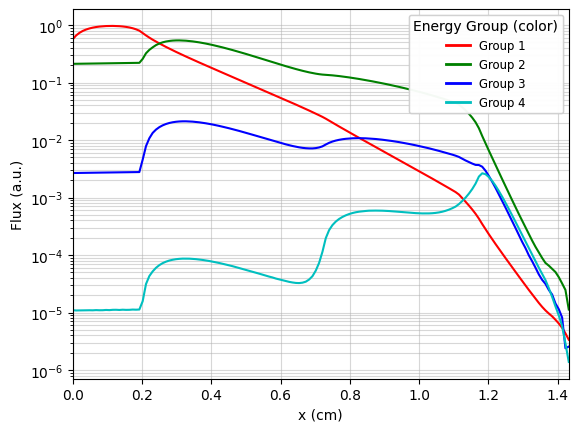

In [3]:
x_interp = np.linspace(0,2.232 - 0.8, 150)

ad_f = np.array([ad_pn.interpolate_solution(x_interp, k=0, energy_group = eg ) for eg in range(4)]).T


# Define colors and linestyles
colors = ['r', 'g', 'b', 'c']
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']


for i in range(4):    
    plt.semilogy(x_interp, ad_f[:, i], color=colors[i], linestyle='-')
    

# Build custom legend handles for clarity
from matplotlib.lines import Line2D

# Legend for energy groups (color)
color_handles = [Line2D([0], [0], color=colors[i], lw=2, label=labels[i]) for i in range(4)]
# Legend for methods (linestyle)
plt.xlim(0.0, 1.432)
plt.grid(which='both', alpha=0.5)
plt.xlabel('x (cm)')
plt.ylabel('Flux (a.u.)')
# Place both legends inside the plot
leg1 = plt.legend(handles=color_handles, title='Energy Group (color)', loc='upper right', fontsize='small')
plt.gca().add_artist(leg1)


In [4]:
print(aux_data_dict["BreedingZone"]["nt"])

[0.00127852 0.00682984 0.06053289 0.24413547]


### Adjoint methodology

In [5]:
from jax_pn.ADPN import residualPN_jit, GlobalSettings
import jax 
import jax.numpy as jnp

parameters_eg = {
    'sigma_t_i'       : ad_pn.jax_sigma_t,
    'sigma_s_k_i_gg'  : ad_pn.jax_sigma_s,
    'h_i'             : ad_pn.jax_h_i,
    'q_i_k_j'         : ad_pn.jax_q_i_k_j
}
elements_per_region = jnp.array(elements_per_region)
res_old = residualPN_jit(ad_pn.global_settings, ad_pn.matrix_settings, parameters_eg, solution)



We define two different objectives:

- Edge fast flux
- Tritium breeding



In [6]:
def edge_fast_flux(global_settings : GlobalSettings, solution):    
    return solution[global_settings.right_dof]

def tritium_breeding(global_settings, elements_per_region, matrix_settings, aux_data_dict, parameters_eg, solution):
    bz_elements_offset = jnp.sum(elements_per_region[:3])  
    bz_elements_total  = elements_per_region[3]
    Ii         = jnp.sum(ad_pn.matrix_settings.mass_matrix, axis=0)    
    tritium_xs = jnp.array(aux_data_dict['BreedingZone']['nt'])
    sol        = solution.reshape((global_settings.n_energy_groups, global_settings.n_moments, -1))
                    
    def element_sum(i):
        return jnp.sum(sol[:, 0, matrix_settings.elem_dof_matrix[i]] * Ii[None, :] , axis = 1) * parameters_eg["h_i"][i]

    elem_sums = jnp.sum(jax.vmap(element_sum)(jnp.arange(bz_elements_offset, bz_elements_total + bz_elements_offset)), axis=0)  * tritium_xs * 1e2
    return jnp.sum(elem_sums) 


In [7]:
dfdx = jax.grad(edge_fast_flux, argnums=1)(ad_pn.global_settings, solution)
A_T_jax = ad_pn.assemble_multigroup_system("vacuum", 4)[0].tocsr().T

adjoint_var_0 = sp.linalg.spsolve(A_T_jax, dfdx)


In [8]:
def regional_params_to_params(elem_offset : int, elem_bz : int, parameters_eg,  h_bz):
    params2 = parameters_eg.copy()

    params2["h_i"] = parameters_eg["h_i"].at[elem_offset:elem_offset + elem_bz].set(h_bz  / elem_bz)
    return params2

In [9]:
def residual_PN_theta(gs, ms, elem_offset,elem_bz, parameters_eg,  h_bz, solution):    
    return residualPN_jit(gs, ms,regional_params_to_params(elem_offset, elem_bz, parameters_eg, h_bz), solution)

In [10]:
drdtheta = jax.jacfwd(residual_PN_theta, argnums =5)

offset = sum(elements_per_region[:3])
bz_elements = elements_per_region[3]

drdtheta_res = drdtheta(ad_pn.global_settings, ad_pn.matrix_settings, offset, bz_elements, parameters_eg, 0.5, solution)

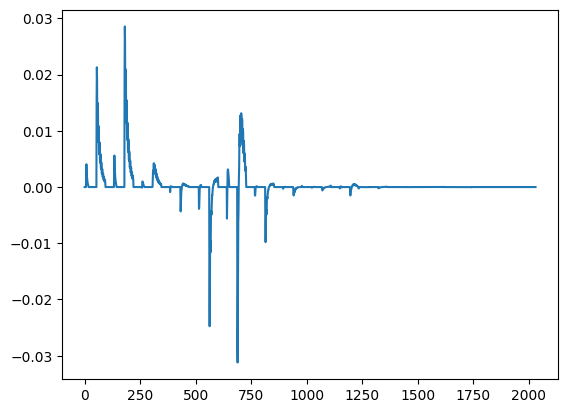

In [11]:
plt.plot(drdtheta_res)

In [12]:
dfdh = np.einsum("i,i->", adjoint_var_0, - np.array(drdtheta_res))

In [13]:
print(dfdh)

-1.986700886729754e-05


In [17]:
def compute_with_param(parameters_eg):
        
        a,b = ad_pn.assemble_multigroup_system("vacuum", 4, parameters_eg=parameters_eg)
        u_base  = sp.linalg.spsolve(a.tocsr(), b.todense()[:,0])
        return edge_fast_flux( ad_pn.global_settings, u_base)


def finite_difference_h(index, stepsize = 1e-7):
    h_i_default = np.array(ad_pn.jax_h_i)


    parameters_eg = {
        'sigma_t_i'       : ad_pn.jax_sigma_t,
        'sigma_s_k_i_gg'  : ad_pn.jax_sigma_s,
        'h_i'             : h_i_default,
        'q_i_k_j'         : ad_pn.jax_q_i_k_j
    }
    base = compute_with_param(parameters_eg)
    
    h_i_perturbed = np.copy(h_i_default)
    h_i_perturbed[index] += stepsize
    parameters_eg['h_i'] = h_i_perturbed        
    edge = compute_with_param(parameters_eg)
    print(base, edge)
    return (edge - base) / stepsize


index = 9
print(parameters_eg["h_i"][index])
print(f"H comparison: index {index}")
print("Autodiff",  dfdh)
print("Finite Diff", finite_difference_h(index))

0.04999999999999999
H comparison: index 9
Autodiff -1.986700886729754e-05
3.3749430985910087e-06 3.37494111157941e-06
Finite Diff -1.987011598536076e-05
